In [3]:
import pandas as pd

In [4]:
data_df = pd.read_csv('../data/rating.csv')
domains_location_df = pd.read_csv('../data/domains_location.csv')
traffic_data_df = pd.read_csv('../data/traffic.csv')

In [5]:
data_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [6]:
domains_location_df.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [7]:
traffic_data_df.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


In [8]:
#top and bottom 10 Websites that have the largest count of news articles
source_group = data_df.groupby('source_name')
article_counts = source_group.size()

top_10_websites = article_counts.sort_values(ascending=False).head(10)
bottom_10_websites = article_counts.sort_values(ascending=True).head(10)

print("Top 10 websites with the most articles:")
print(top_10_websites)

print("\nBottom 10 websites with the fewest articles:")
print(bottom_10_websites)


Top 10 websites with the most articles:
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
dtype: int64

Bottom 10 websites with the fewest articles:
source_name
AllAfrica - Top Africa News     20
The Verge                      214
CNN                            267
Wired                          270
Euronews                       286
ReadWrite                      324
Gizmodo.com                    388
Android Central                522
Time                           600
CNA                            674
dtype: int64


In [9]:
#top and bottom 10 Websites with the highest numbers of visitors traffic 
top_10_traffic_websites = traffic_data_df.sort_values(by='GlobalRank', ascending=True).head(10)
bottom_10_traffic_websites = traffic_data_df.sort_values(by='GlobalRank', ascending=True).tail(10)

print("Top 10 websites with the highest visitor traffic:")
print(top_10_traffic_websites[['Domain', 'GlobalRank']])

print("\nBottom 10 websites with the lowest visitor traffic:")
print(bottom_10_traffic_websites[['Domain', 'GlobalRank']])

Top 10 websites with the highest visitor traffic:
                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10

Bottom 10 websites with the lowest visitor traffic:
                        Domain  GlobalRank
999990            eiretrip.com      999991
999991    exploring-africa.com      999992
999992                hmag.com      999993
999993          irishcycle.com      999994
999994         keith-baker.com      999995
999995              kireie.com      999996
999996             mt-lock.com      999997
999997           pinkwater.com      999998
999998          soderhomes.com      999999
999999  toyotamusicfactory.com     1000000


In [10]:
#top and bottom 10 Countries with the highest number of news media organisations (represented by domains in the data) 
country_media_orgs = domains_location_df.groupby('Country')['SourceCommonName'].nunique()
top_10_countries = country_media_orgs.sort_values(ascending=False).head(10)
bottom_10_countries = country_media_orgs.sort_values(ascending=True).head(10)

print("Top 10 countries with the most news media organizations:")
print(top_10_countries)

print("\nBottom 10 countries with the fewest news media organizations:")
print(bottom_10_countries)

Top 10 countries with the most news media organizations:
Country
United States     14111
United Kingdom     1946
Italy              1804
France             1039
Russia             1020
Canada              886
Germany             884
China               779
Turkey              725
India               686
Name: SourceCommonName, dtype: int64

Bottom 10 countries with the fewest news media organizations:
Country
American Samoa              1
Aruba                       1
Cook Islands                1
Comoros                     1
Guernsey                    1
Guinea-Bissau               1
Guadeloupe                  1
Greenland                   1
Isle of Man                 1
Turks and Caicos Islands    1
Name: SourceCommonName, dtype: int64


In [18]:
#top and bottom 10 Countries that have many articles written about them - the content of the news is about that country
countries = domains_location_df['Country'].unique()

data_df['title'] = data_df['title'].fillna('').astype(str)

def find_countries_in_title(title):
    try:
        title = str(title)
        mentioned_countries = [str(country) for country in countries if str(country) in title]
        return mentioned_countries if mentioned_countries else None
    except Exception as e:
        print(f"Error processing title: {title}, Error: {e}")
        return None

data_df['mentioned_countries'] = data_df['title'].apply(find_countries_in_title)

exploded_df = data_df.explode('mentioned_countries')

country_mentions = exploded_df['mentioned_countries'].value_counts()

top_10_country_mentions = country_mentions.head(10)
bottom_10_country_mentions = country_mentions.tail(10)

print("Top 10 countries with the most articles written about them:")
print(top_10_country_mentions)

print("\nBottom 10 countries with the fewest articles written about them:")
print(bottom_10_country_mentions)

Top 10 countries with the most articles written about them:
mentioned_countries
nan          2108
India        1338
Israel       1206
China         645
Russia        618
Ukraine       516
Canada        400
Australia     320
Iran          214
Pakistan      199
Name: count, dtype: int64

Bottom 10 countries with the fewest articles written about them:
mentioned_countries
Djibouti      1
Oceans        1
Botswana      1
Samoa         1
Seychelles    1
Fiji          1
Mauritius     1
Honduras      1
Barbados      1
Bolivia       1
Name: count, dtype: int64


In [21]:
#top and bottom 10 Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 
    'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 
    'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 
    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 
    'Slovenia', 'Spain', 'Sweden'
]
middle_east_countries = [
    'Bahrain', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 
    'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 
    'Turkey', 'United Arab Emirates', 'Yemen'
]

def categorize_article_region(title):
    if pd.isna(title):
        return None
    title = str(title)
    mentioned_regions = []
    
    if any(country in title for country in africa_countries):
        mentioned_regions.append('Africa')
    if any(country in title for country in eu_countries):
        mentioned_regions.append('EU')
    if any(country in title for country in middle_east_countries):
        mentioned_regions.append('Middle East')
    if 'US' in title or 'United States' in title or 'America' in title:
        mentioned_regions.append('US')
    if 'China' in title:
        mentioned_regions.append('China')
    if 'Russia' in title:
        mentioned_regions.append('Russia')
    if 'Ukraine' in title:
        mentioned_regions.append('Ukraine')
    
    return mentioned_regions if mentioned_regions else None

data_df['mentioned_regions'] = data_df['title'].apply(categorize_article_region)

exploded_df = data_df.explode('mentioned_regions')

region_mentions = exploded_df.groupby(['source_name', 'mentioned_regions']).size().unstack(fill_value=0)

total_mentions = region_mentions.sum(axis=1)

sorted_mentions = total_mentions.sort_values(ascending=False)

top_10_websites = sorted_mentions.head(10)
bottom_10_websites = sorted_mentions.tail(10)

print("Top 10 websites reporting on specified regions:")
print(region_mentions.loc[top_10_websites.index])

print("\nBottom 10 websites reporting on specified regions:")
print(region_mentions.loc[bottom_10_websites.index])

Top 10 websites reporting on specified regions:
mentioned_regions             Africa  China  EU  Middle East  Russia    US  \
source_name                                                                  
Globalsecurity.org               104    194  78          522     187   226   
GlobeNewswire                     18     25  48           17       1  1034   
The Times of India                79    162  85          250      64   322   
ETF Daily News                     2     55  17            2       0   546   
Al Jazeera English                65     21  30          302      55    83   
RT                                33     14  22           84     152    78   
ABC News                          48     48  66           91      46   101   
International Business Times      21     41  36          100      20    90   
BBC News                          69     13  36           74      19    46   
The Punch                        185      7  13            9       0    30   

mentioned_regio

In [31]:
#top and bottom 10 Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance
#compare the impact of using mean/average and median, 
#check the distribution of sentiments for a particular domain (select the top 10 domains by visitors traffic) amount of news reported or vs the global news sentiment distribution)

from textblob import TextBlob
import pandas as pd

data_df = pd.read_csv('../data/rating.csv')

if 'title_sentiment' not in data_df.columns or data_df['title_sentiment'].isna().all():
    def get_sentiment(title):
        if pd.isna(title):
            return None
        analysis = TextBlob(str(title))

        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    
    data_df['title_sentiment'] = data_df['title'].apply(get_sentiment)

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data_df['title_sentiment_numeric'] = data_df['title_sentiment'].map(sentiment_mapping)

print("Sentiment values mapped:", data_df['title_sentiment_numeric'].value_counts(dropna=False))

grouped_df = data_df.groupby('source_name')

sentiment_counts = grouped_df['title_sentiment_numeric'].agg(
    positive_count=lambda x: (x > 0).sum(),
    neutral_count=lambda x: (x == 0).sum(),
    negative_count=lambda x: (x < 0).sum()
)

sentiment_stats = grouped_df['title_sentiment_numeric'].agg(
    mean_sentiment='mean',
    median_sentiment='median',
    variance_sentiment='var'
)

combined_df = pd.concat([sentiment_counts, sentiment_stats], axis=1)

combined_df = combined_df[(combined_df['positive_count'] > 0) | 
                          (combined_df['neutral_count'] > 0) | 
                          (combined_df['negative_count'] > 0)]

print("Combined DataFrame:", combined_df.shape)
print(combined_df.head())

top_10_mean = combined_df.sort_values(by='mean_sentiment', ascending=False).head(10)
bottom_10_mean = combined_df.sort_values(by='mean_sentiment', ascending=True).head(10)

print("Top 10 websites by mean sentiment:")
print(top_10_mean)

print("\nBottom 10 websites by mean sentiment:")
print(bottom_10_mean)

top_10_median = combined_df.sort_values(by='median_sentiment', ascending=False).head(10)
bottom_10_median = combined_df.sort_values(by='median_sentiment', ascending=True).head(10)

print("\nTop 10 websites by median sentiment:")
print(top_10_median)

print("\nBottom 10 websites by median sentiment:")
print(bottom_10_median)

traffic_data_df = pd.read_csv('../data/traffic.csv')
top_domains_by_traffic = traffic_data_df.sort_values(by='GlobalRank', ascending=True).head(10)['Domain']

top_domain_sentiments = data_df[data_df['source_name'].isin(top_domains_by_traffic)]

global_sentiment_distribution = data_df['title_sentiment_numeric'].value_counts(normalize=True)
top_domain_sentiment_distribution = top_domain_sentiments['title_sentiment_numeric'].value_counts(normalize=True)

print("\nGlobal news sentiment distribution:")
print(global_sentiment_distribution)

print("\nTop 10 domains by traffic sentiment distribution:")
print(top_domain_sentiment_distribution)

Sentiment values mapped: title_sentiment_numeric
 0    42926
-1     9133
 1     6297
Name: count, dtype: int64
Combined DataFrame: (29, 6)
                             positive_count  neutral_count  negative_count  \
source_name                                                                  
ABC News                                139           1193             726   
Al Jazeera English                       31            927             706   
AllAfrica - Top Africa News               0             12               8   
Android Central                         272            212              38   
BBC News                                 74           1185             854   

                             mean_sentiment  median_sentiment  \
source_name                                                     
ABC News                          -0.285228               0.0   
Al Jazeera English                -0.405649               0.0   
AllAfrica - Top Africa News       -0.400000           

Summary statistics for content lengths across sites:
                              mean_length  median_length  variance_length
source_name                                                              
ABC News                       213.101069          214.0        45.436547
Al Jazeera English             212.943510          213.0        16.847078
AllAfrica - Top Africa News    213.350000          213.0         0.344737
Android Central                213.961686          214.0         0.178951
BBC News                       212.409371          213.0        98.866901
Boing Boing                    213.502104          214.0         0.430122
Business Insider               213.211898          213.0         0.329401
CNA                            213.375371          214.0         1.557253
CNN                            213.573034          214.0         0.441075
Deadline                       213.456009          214.0         1.157032
Digital Trends                 213.608418          214.0   

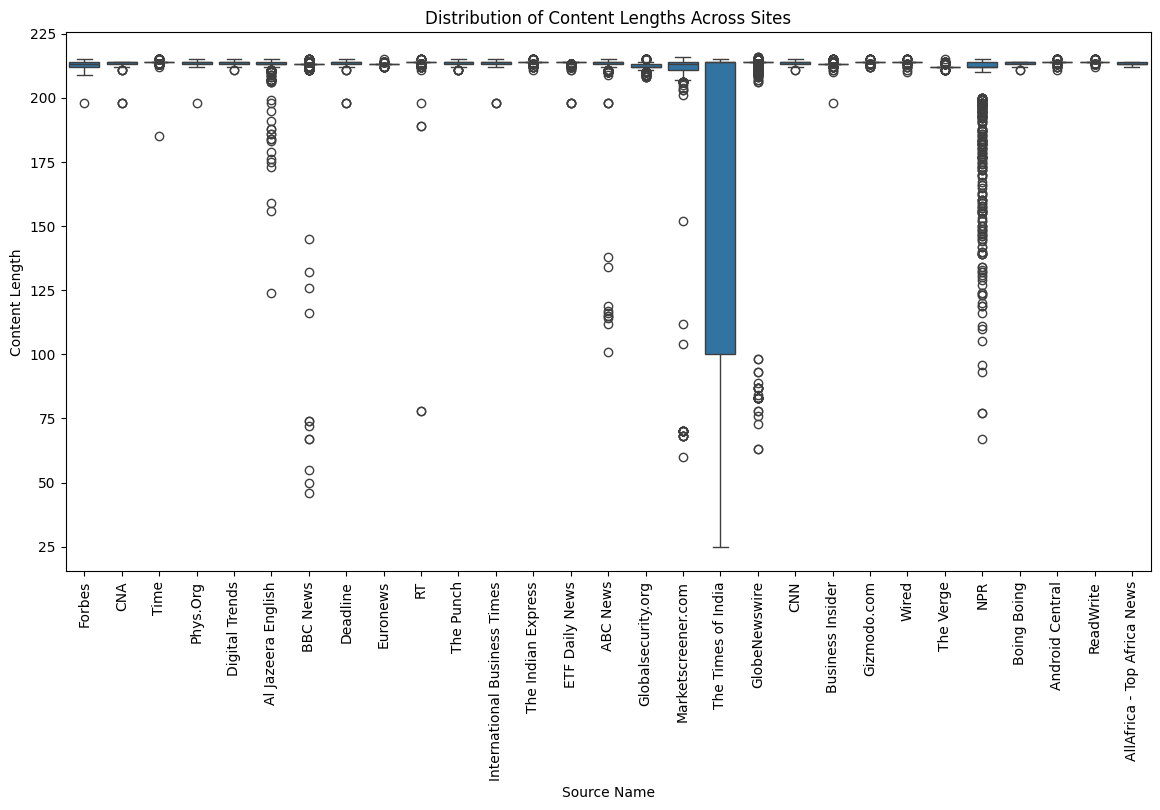

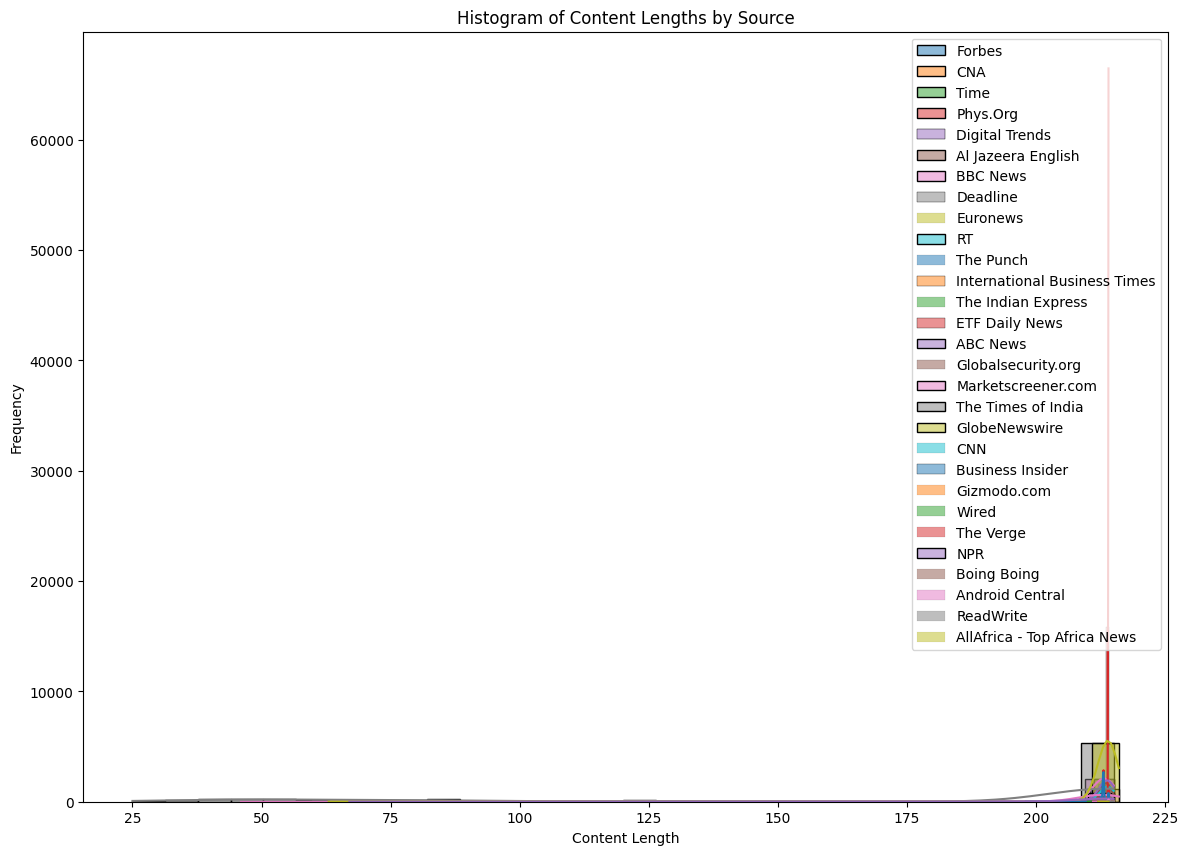

In [33]:
#Compare the content metadata across sites 
#How similar are the raw message lengths across sites? Check the distribution among sites

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv('../data/rating.csv')

data_df['content_length'] = data_df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

grouped_lengths = data_df.groupby('source_name')['content_length'].agg(
    mean_length='mean',
    median_length='median',
    variance_length='var'
)

print("Summary statistics for content lengths across sites:")
print(grouped_lengths)

plt.figure(figsize=(14, 7))
sns.boxplot(x='source_name', y='content_length', data=data_df)
plt.xticks(rotation=90)
plt.title('Distribution of Content Lengths Across Sites')
plt.xlabel('Source Name')
plt.ylabel('Content Length')
plt.show()

plt.figure(figsize=(14, 10))
for source in data_df['source_name'].unique():
    subset = data_df[data_df['source_name'] == source]
    sns.histplot(subset['content_length'], kde=True, label=source, bins=30, alpha=0.5)

plt.legend(loc='upper right')
plt.title('Histogram of Content Lengths by Source')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()



Summary statistics for title word counts across sites:
                              mean_word_count  median_word_count  \
source_name                                                        
ABC News                            13.480078               14.0   
Al Jazeera English                  10.158654               10.0   
AllAfrica - Top Africa News          9.950000               10.0   
Android Central                     12.243295               12.0   
BBC News                             9.342168                9.0   
Boing Boing                         12.150070               12.0   
Business Insider                    18.022616               18.0   
CNA                                 10.954006               11.0   
CNN                                 13.235955               13.0   
Deadline                            15.516094               15.0   
Digital Trends                      10.858418               11.0   
ETF Daily News                      10.767945               1

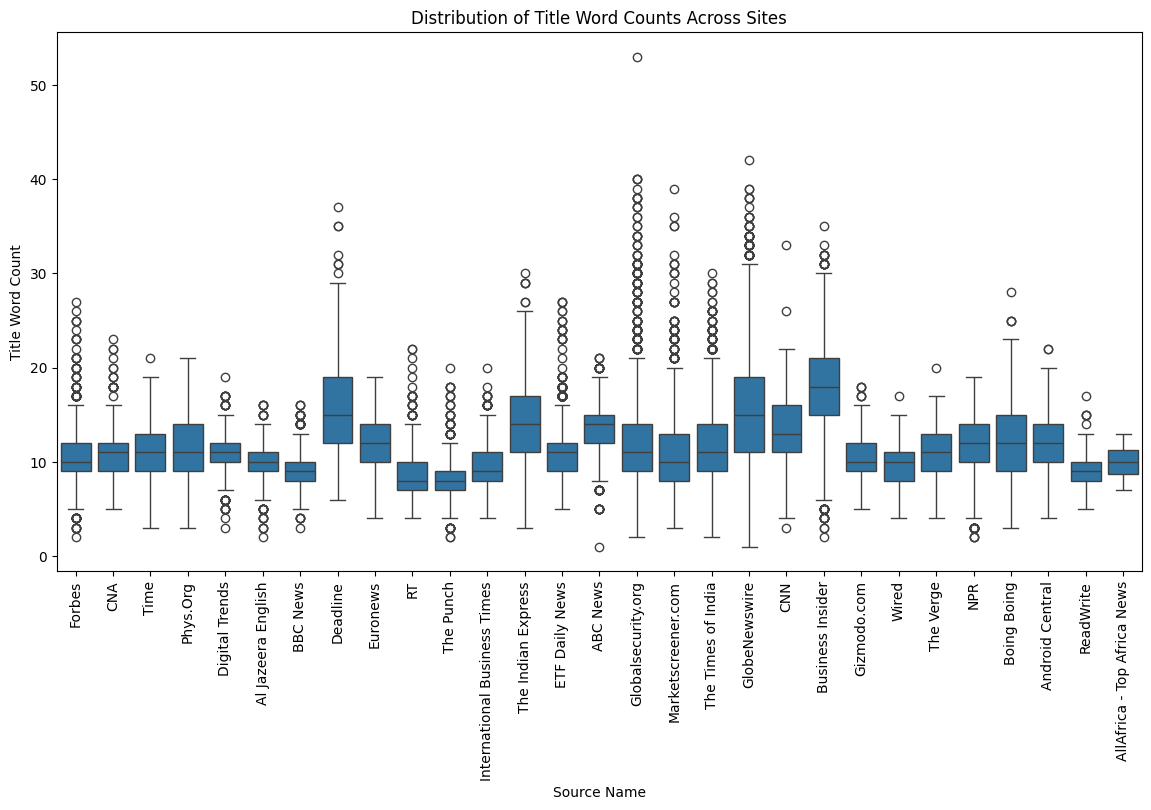

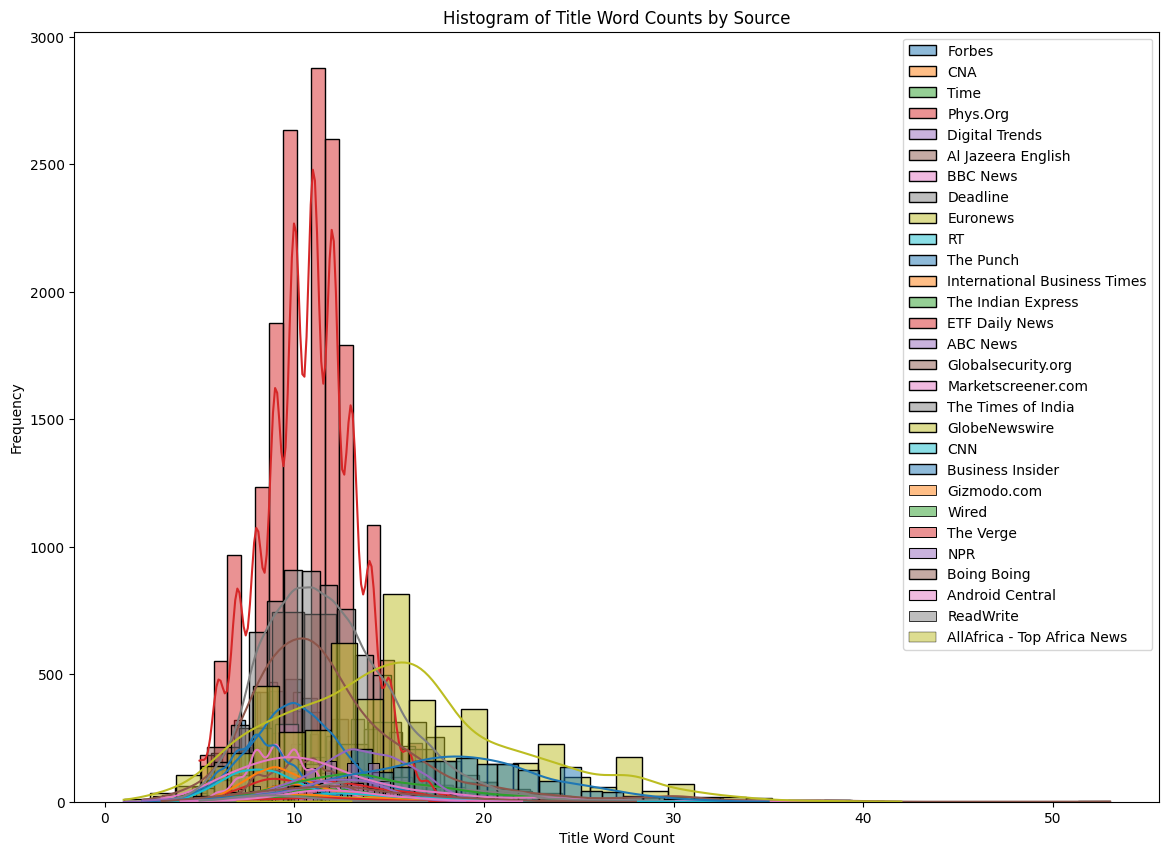

In [36]:
#Compare the content metadata across sites 
#How similar are the number of words in the title across sites? Check the distribution among sites
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv('../data/rating.csv')

data_df['title_word_count'] = data_df['title'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

grouped_word_count = data_df.groupby('source_name')['title_word_count'].agg(
    mean_word_count='mean',
    median_word_count='median',
    variance_word_count='var'
)

print("Summary statistics for title word counts across sites:")
print(grouped_word_count)

plt.figure(figsize=(14, 7))
sns.boxplot(x='source_name', y='title_word_count', data=data_df)
plt.xticks(rotation=90)
plt.title('Distribution of Title Word Counts Across Sites')
plt.xlabel('Source Name')
plt.ylabel('Title Word Count')
plt.show()

plt.figure(figsize=(14, 10))
for source in data_df['source_name'].unique():
    subset = data_df[data_df['source_name'] == source]
    sns.histplot(subset['title_word_count'], kde=True, label=source, bins=30, alpha=0.5)

plt.legend(loc='upper right')
plt.title('Histogram of Title Word Counts by Source')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency')
plt.show()


Combined DataFrame shape after merge: (10, 5)
                Domain  total_reports  average_sentiment  median_sentiment  \
0        aljazeera.com           1664          -0.405649               0.0   
1   androidcentral.com            522           0.448276               1.0   
2              bbc.com           2113          -0.369143               0.0   
3  businessinsider.com           2034          -0.321042               0.0   
4              cnn.com            267          -0.295880               0.0   

   GlobalRank  
0         516  
1        3375  
2          92  
3         115  
4          78  


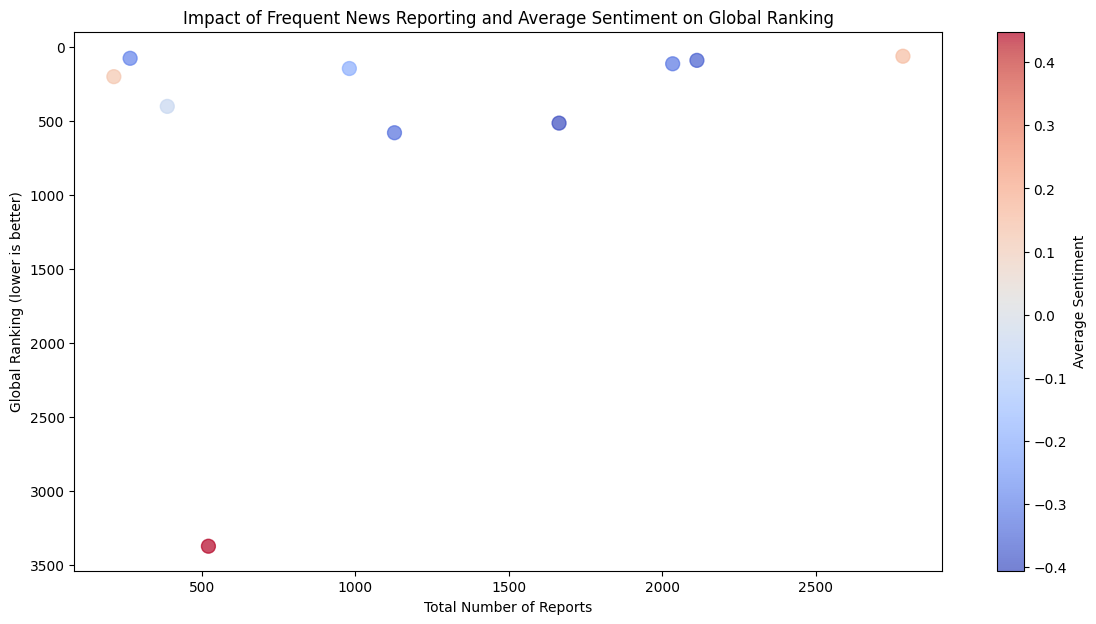

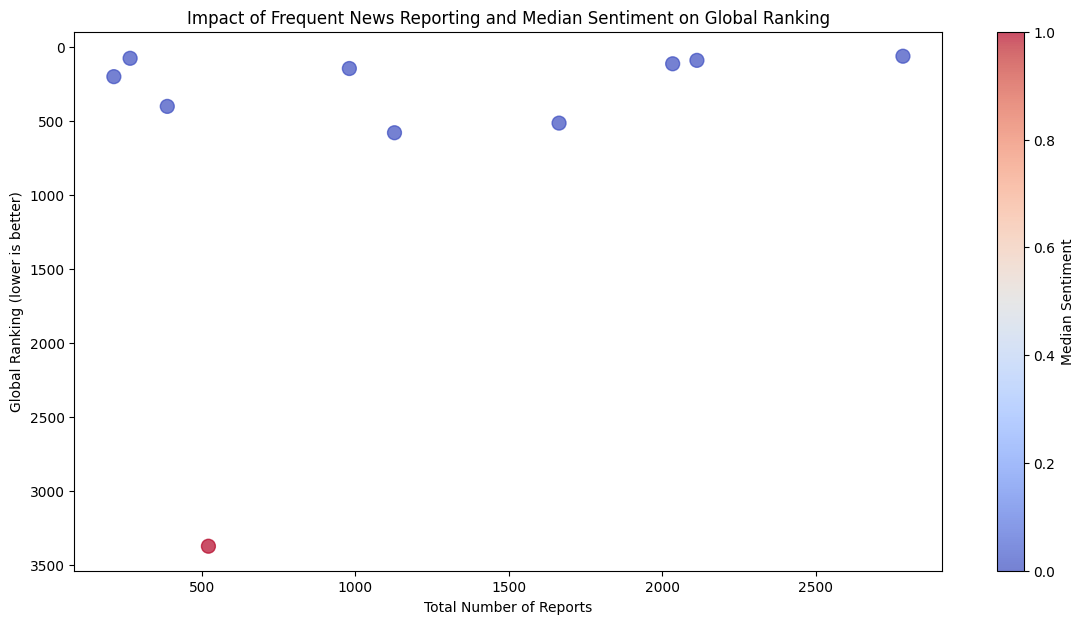

In [43]:
#What is the impact of frequent news reporting and sentiment to the website’s global ranking? 
#Do a 2D scatter plot where x-axis is the total number of reports by a website, y-axis is the global ranking of the site, and the color representing average/median sentiment.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv('../data/rating.csv')
traffic_data_df = pd.read_csv('../data/traffic.csv')

if 'title_sentiment_numeric' not in data_df.columns:
    sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    data_df['title_sentiment_numeric'] = data_df['title_sentiment'].map(sentiment_mapping)

source_to_domain = {
    'Forbes': 'forbes.com',
    'CNN': 'cnn.com',
    'BBC News': 'bbc.co.uk',
    'The Verge': 'theverge.com',
    'Gizmodo.com': 'gizmodo.com',
    'NPR': 'npr.org',
    'Business Insider': 'businessinsider.com',
    'Android Central': 'androidcentral.com',
    'RT': 'rt.com',
    'Al Jazeera English': 'aljazeera.com',
    'BBC News': 'bbc.com',
}

data_df['Domain'] = data_df['source_name'].map(source_to_domain)

data_df = data_df.dropna(subset=['Domain'])

total_reports = data_df.groupby('Domain').size().reset_index(name='total_reports')

sentiment_stats = data_df.groupby('Domain')['title_sentiment_numeric'].agg(
    average_sentiment='mean',
    median_sentiment='median'
).reset_index()

combined_df = pd.merge(total_reports, sentiment_stats, on='Domain')
combined_df = pd.merge(combined_df, traffic_data_df[['Domain', 'GlobalRank']], on='Domain')

print("Combined DataFrame shape after merge:", combined_df.shape)
print(combined_df.head())

plt.figure(figsize=(14, 7))
scatter = plt.scatter(
    combined_df['total_reports'], 
    combined_df['GlobalRank'], 
    c=combined_df['average_sentiment'], 
    cmap='coolwarm', 
    s=100, 
    alpha=0.7
)
plt.colorbar(scatter, label='Average Sentiment')
plt.title('Impact of Frequent News Reporting and Average Sentiment on Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking (lower is better)')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(14, 7))
scatter = plt.scatter(
    combined_df['total_reports'], 
    combined_df['GlobalRank'], 
    c=combined_df['median_sentiment'], 
    cmap='coolwarm', 
    s=100, 
    alpha=0.7
)
plt.colorbar(scatter, label='Median Sentiment')
plt.title('Impact of Frequent News Reporting and Median Sentiment on Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking (lower is better)')
plt.gca().invert_yaxis()
plt.show()
